In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv("clean_data.csv", delimiter=',')
pd.set_option('display.max_column', None)

In [3]:
print("Print first 5 rows of the dataset")
print(df.head())
print("\n\n")

print("Print the info")
print(df.info())
print("\n\n")

print("Null values")
print(df.isnull().sum())
print("\n\n")

print("mean of price")
print(df.price.mean())

Print first 5 rows of the dataset
    price  area              status  bhk  bathroom  age    location  \
0   37.49   872       Ready to move    2       NaN  1.0   Sembakkam   
1   93.54  1346  Under Construction    3       2.0  NaN    Selaiyur   
2  151.00  2225  Under Construction    3       NaN  0.0   Mogappair   
3   49.00  1028       Ready to move    2       2.0  3.0    Ambattur   
4   42.28   588  Under Construction    2       1.0  0.0  Pallavaram   

                                builder  
0                         MP Developers  
1                         DAC Promoters  
2     Casagrand Builder Private Limited  
3                Dugar Housing Builders  
4  Radiance Realty Developers India Ltd  



Print the info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   st

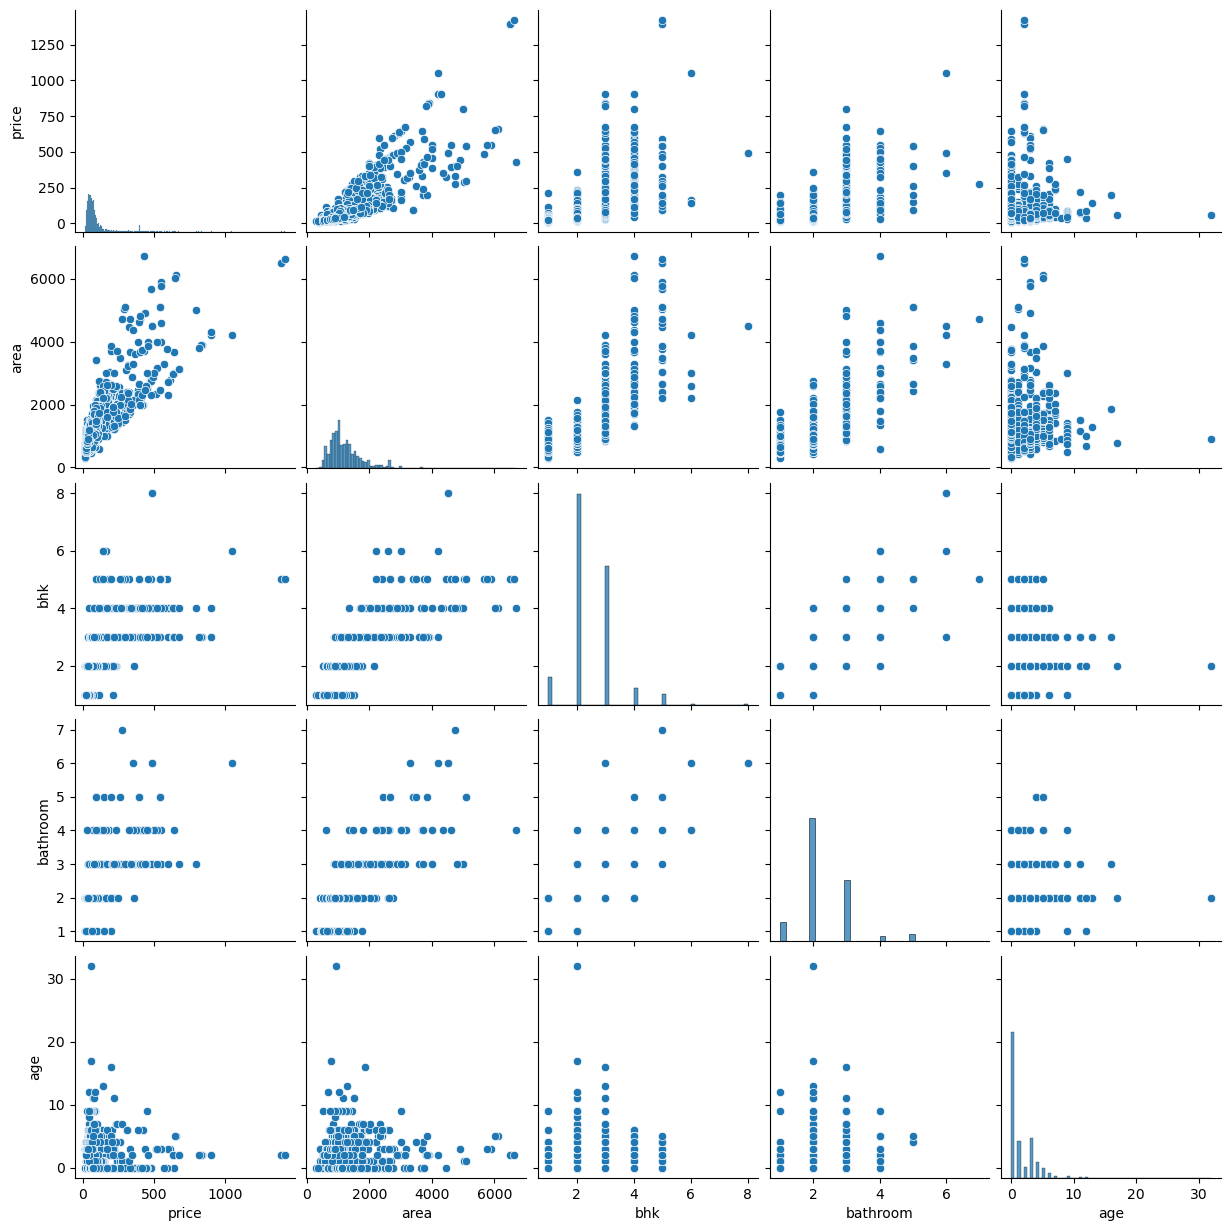

In [4]:
sns.pairplot(df);

In [5]:
bathroomNan = df[df['bathroom'].isnull()].index

clean_df = df.drop(bathroomNan)
print("clean dataset")
print(clean_df.head())

clean dataset
     price  area              status  bhk  bathroom  age       location  \
1    93.54  1346  Under Construction    3       2.0  NaN       Selaiyur   
3    49.00  1028       Ready to move    2       2.0  3.0       Ambattur   
4    42.28   588  Under Construction    2       1.0  0.0     Pallavaram   
5   188.00  2221  Under Construction    3       3.0  0.0  Virugambakkam   
11  240.00  1500       Ready to move    3       3.0  1.0     Anna Nagar   

                                 builder  
1                          DAC Promoters  
3                 Dugar Housing Builders  
4   Radiance Realty Developers India Ltd  
5               Traventure Homes Pvt Ltd  
11            Pushkar Properties Pvt Ltd  


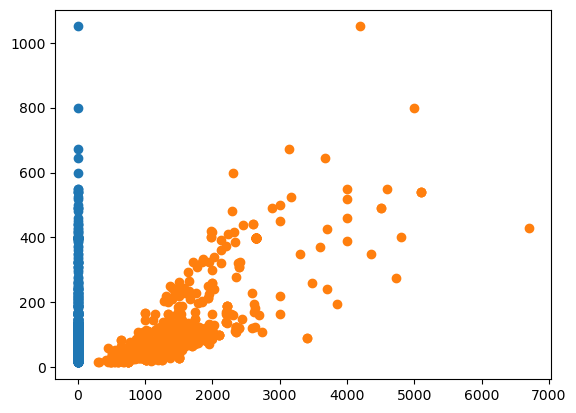

In [6]:
plt.scatter(clean_df.bathroom, clean_df.price);

plt.scatter(clean_df.area, clean_df.price);

In [7]:
y = clean_df.price.values.reshape(-1,1)
x = clean_df.area.values.reshape(-1,1)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1/4, random_state=1)

In [9]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

y_predict = linear_regressor.predict(x_test)

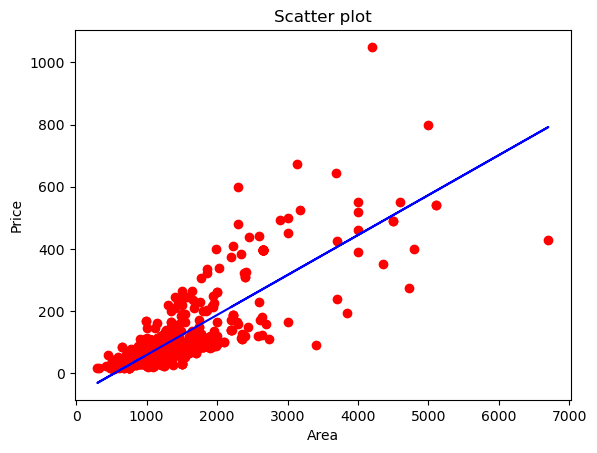

In [10]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, linear_regressor.predict(x_train), color='blue')
plt.title('Scatter plot')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [11]:
from sklearn.metrics import r2_score

print("\n")
print(f"R2: {r2_score(y_test, y_predict)}")



R2: 0.6147085008483107
